In [88]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [48]:
wine=pd.read_csv("/Users/mahikajadhav/Downloads/winequality-red.csv")

In [49]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [83]:
wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [50]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [51]:
wine.sample(8)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1242,9.0,0.40,0.41,2.0,0.058,15.0,40.0,0.99414,3.22,0.60,12.2,6
218,7.5,0.49,0.19,1.9,0.076,10.0,44.0,0.99570,3.39,0.54,9.7,5
775,7.2,1.00,0.00,3.0,0.102,7.0,16.0,0.99586,3.43,0.46,10.0,5
1115,7.0,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3,6
1152,8.3,0.60,0.25,2.2,0.118,9.0,38.0,0.99616,3.15,0.53,9.8,5
190,8.2,0.50,0.35,2.9,0.077,21.0,127.0,0.99760,3.23,0.62,9.4,5
893,7.2,0.66,0.03,2.3,0.078,16.0,86.0,0.99743,3.53,0.57,9.7,5
200,9.6,0.32,0.47,1.4,0.056,9.0,24.0,0.99695,3.22,0.82,10.3,7


In [52]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [53]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [54]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [55]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [56]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


RELATIONAL PLOTS

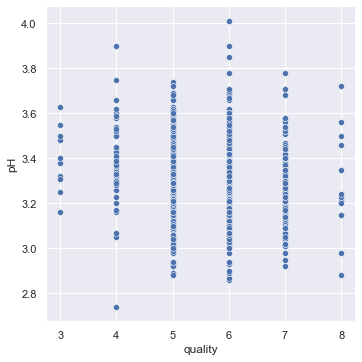

In [57]:
sns.relplot(x='quality',y='pH', data=wine)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


Text(0.5, 1.0, 'Distribution in target variable')

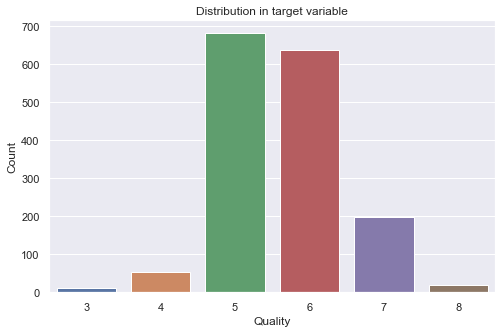

In [58]:
print(wine['quality'].value_counts())
plt.figure(figsize = (8, 5))
sns.countplot(x = wine['quality'])
plt.xlabel('Quality', size = 12)
plt.ylabel("Count", size = 12)
plt.title("Distribution in target variable", size = 12)

<AxesSubplot:>

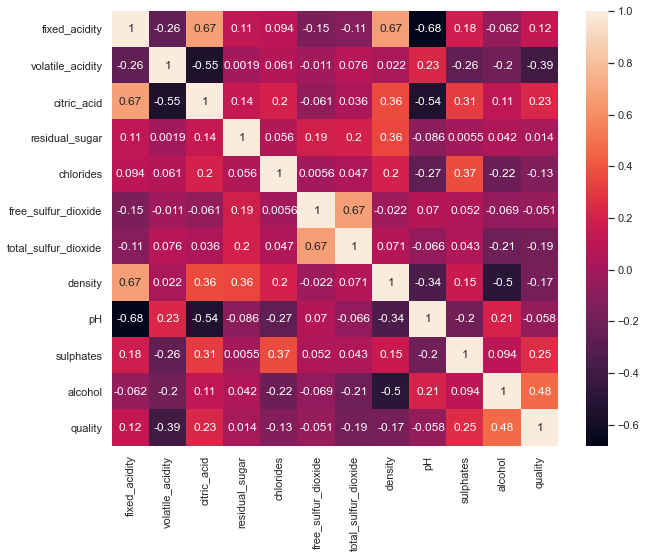

In [111]:
cor = wine.corr()
plt.figure(figsize = (10,8))
sns.heatmap(cor, annot = True)

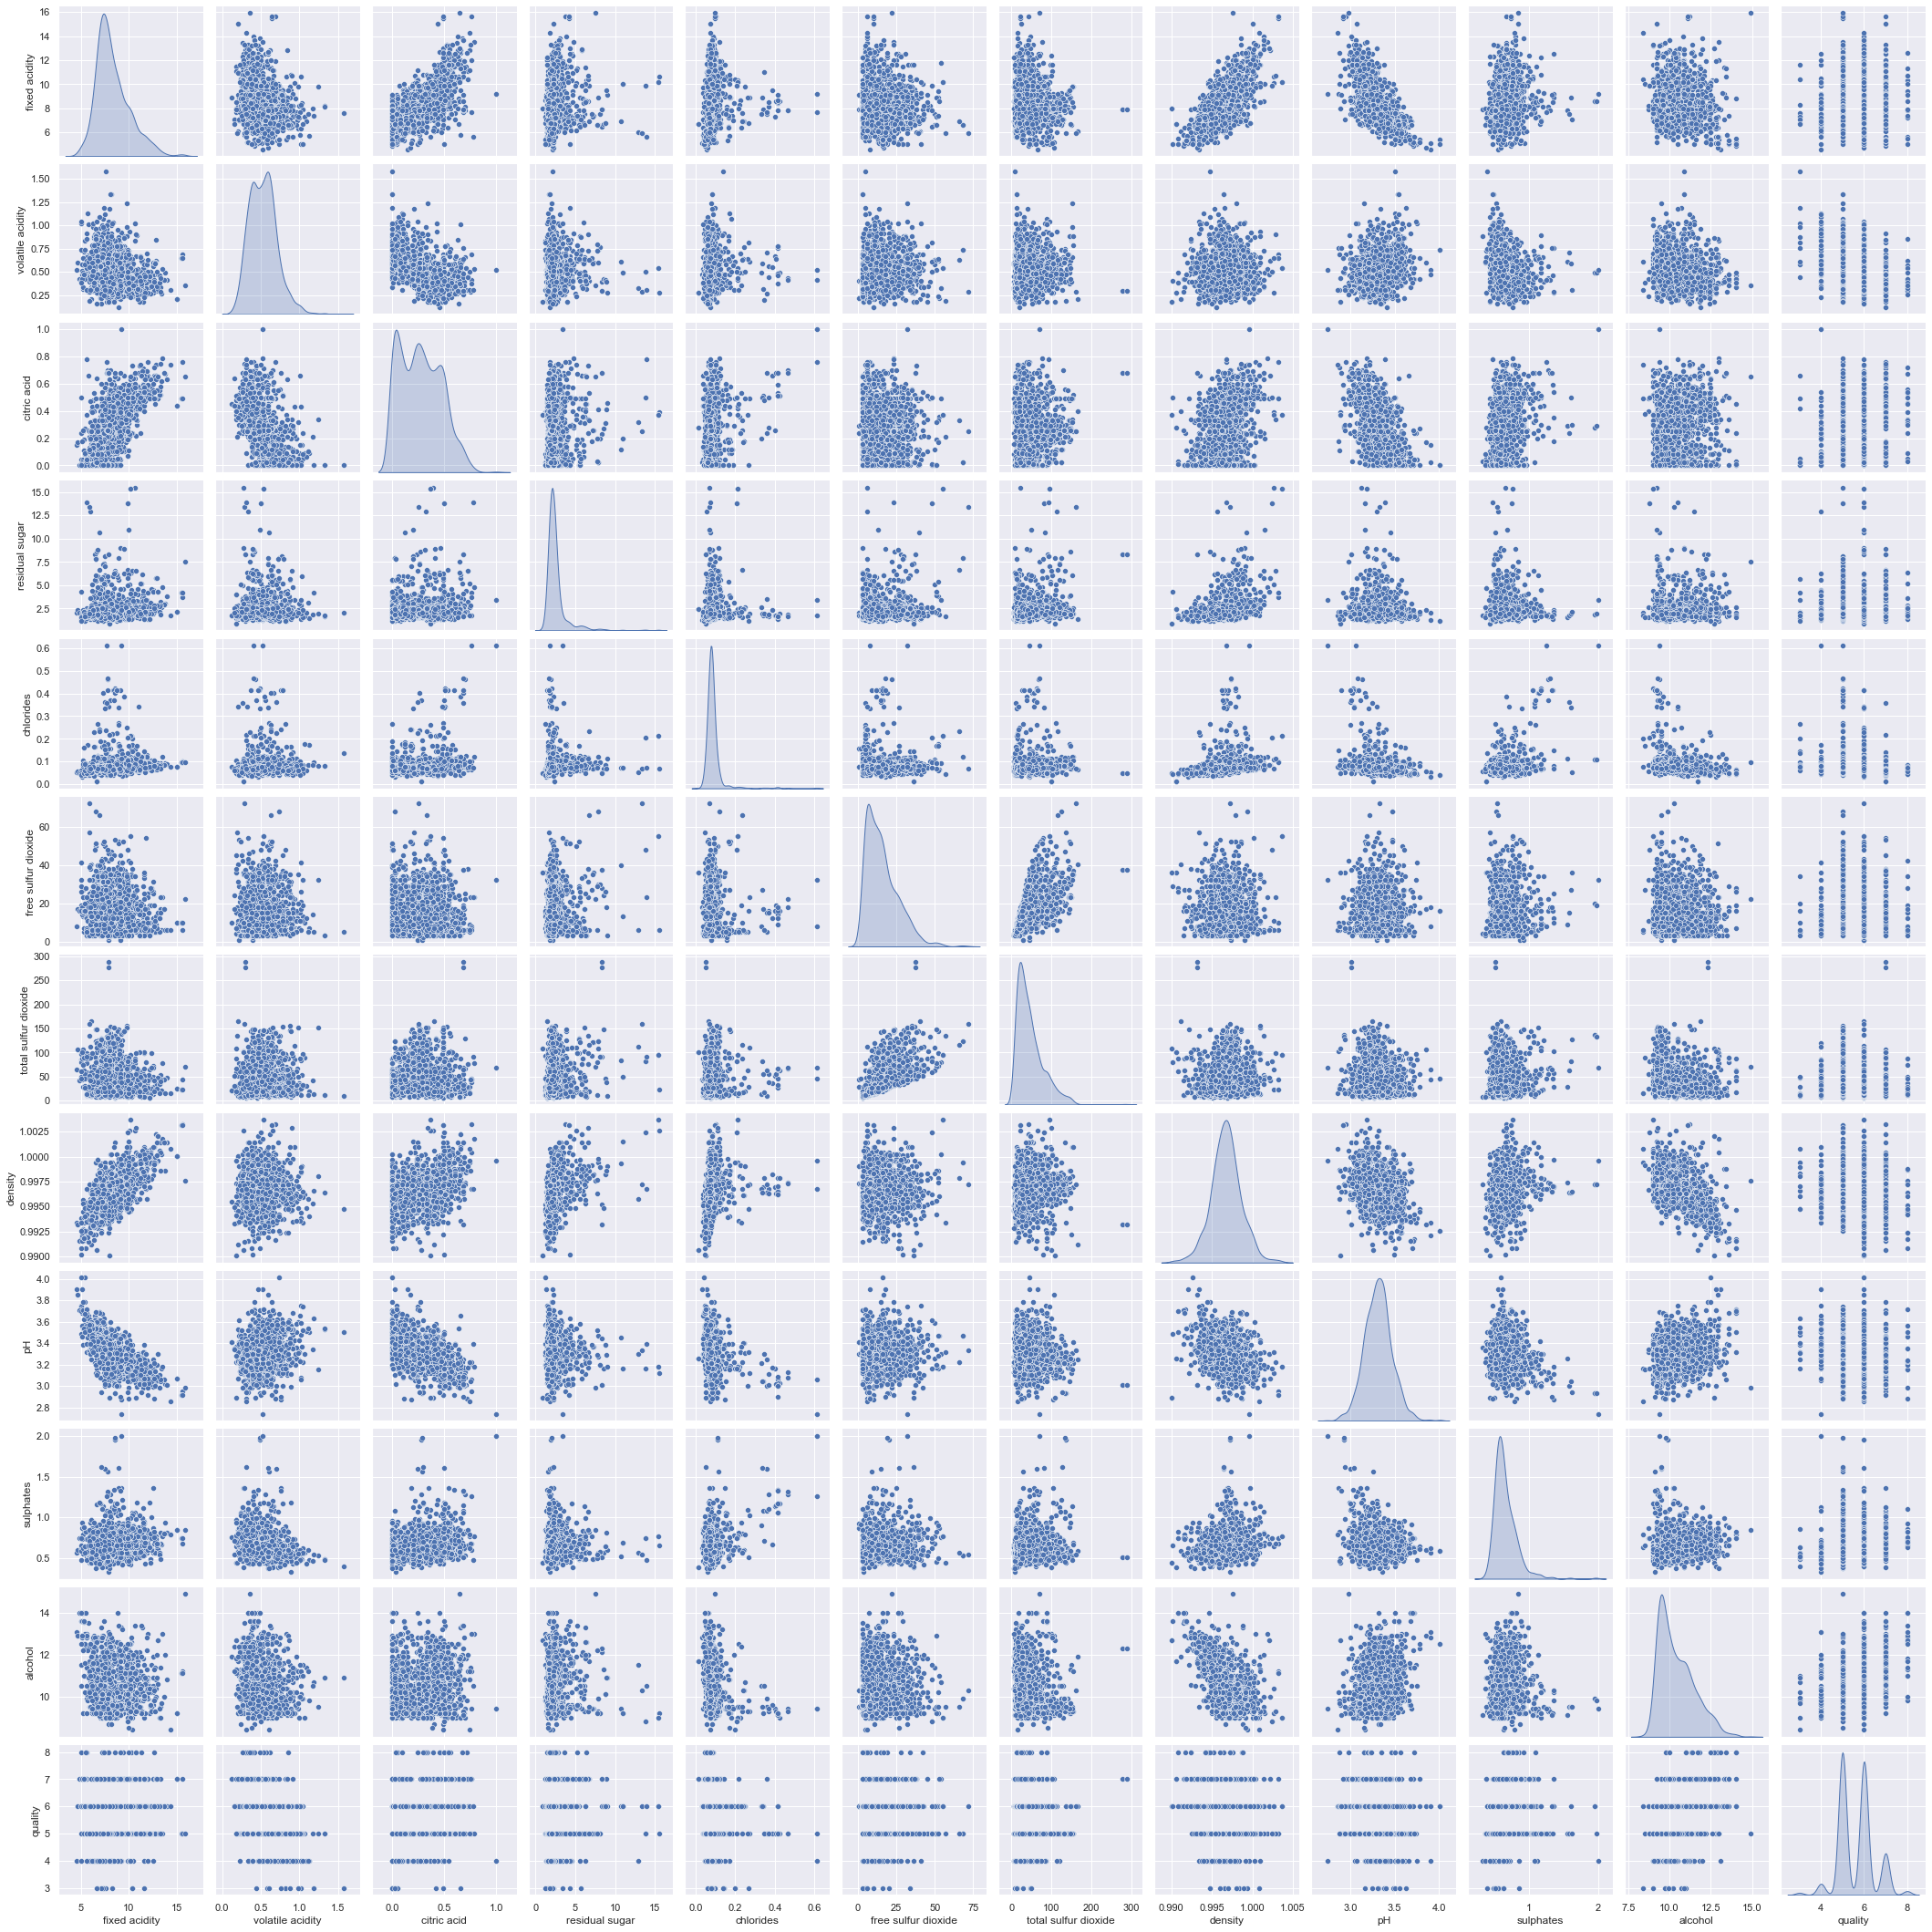

In [60]:
sns.pairplot(wine,diag_kind='kde')

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

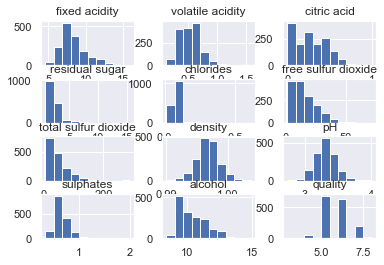

In [61]:
wine.hist()

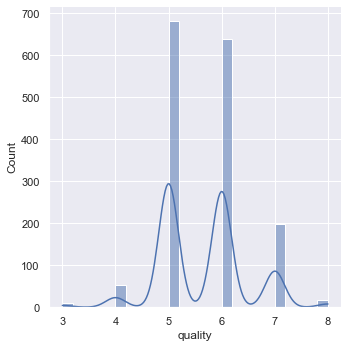

In [62]:
sns.displot(data= wine, x='quality' , bins=25 , kde=True)


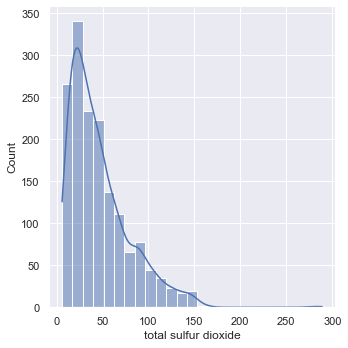

In [63]:
sns.displot(data= wine, x='total sulfur dioxide' , bins=25 , kde=True)

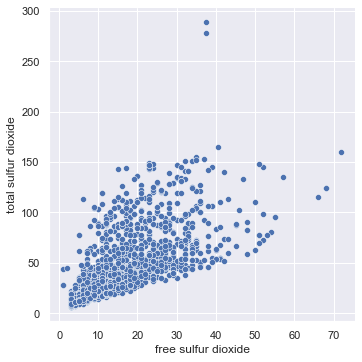

In [64]:
sns.relplot(x='free sulfur dioxide',y='total sulfur dioxide', data=wine)

VIOLIN PLOT

<AxesSubplot:xlabel='citric acid', ylabel='alcohol'>

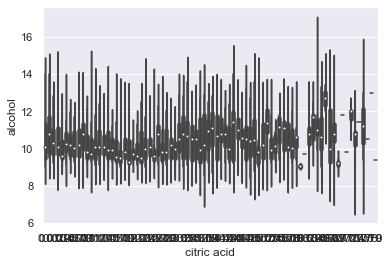

In [65]:
sns.violinplot(x = "citric acid", y = "alcohol", data = wine)

SWARM PLOT

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 96.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 87.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 90.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 86.2% of the points

<AxesSubplot:xlabel='citric acid', ylabel='quality'>

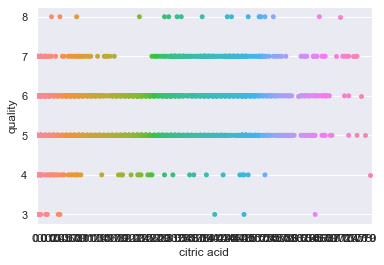

In [66]:
sns.swarmplot(x = "citric acid", y = "quality", data = wine)

JOINT PLOT

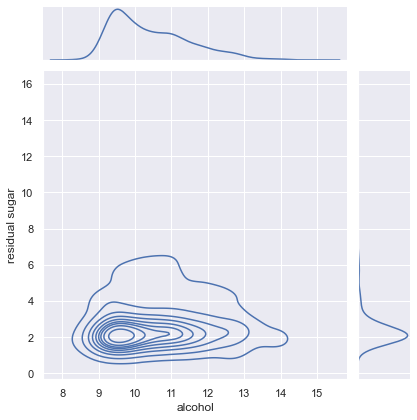

In [67]:
sns.jointplot(x = "alcohol", y = "residual sugar", data = wine, kind="kde")

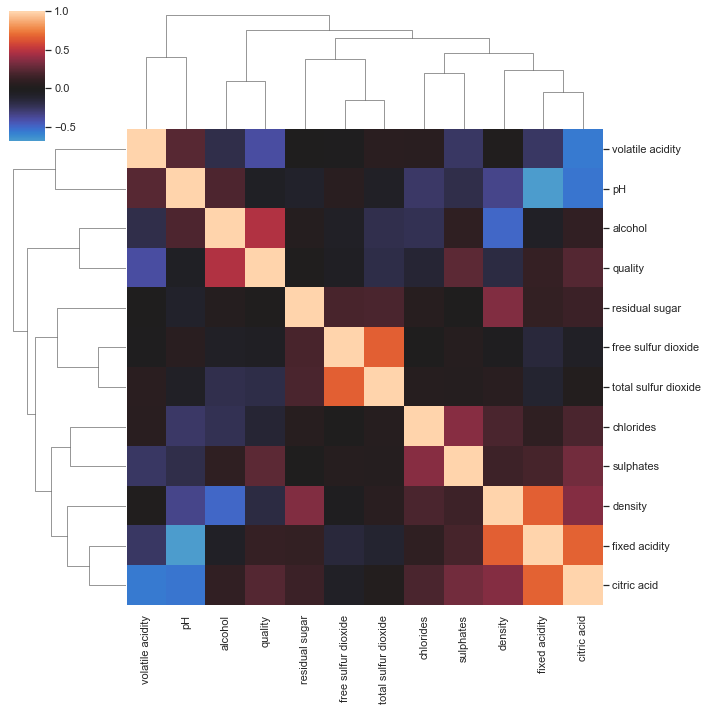

In [68]:
sns.clustermap(wine.corr(), center=0)

<AxesSubplot:xlabel='citric acid', ylabel='Proportion'>

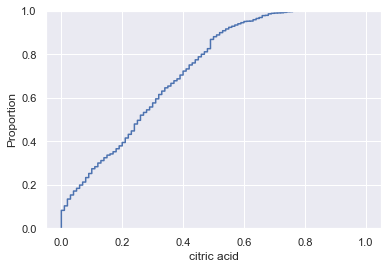

In [69]:
sns.ecdfplot(data=wine, x="citric acid")


<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

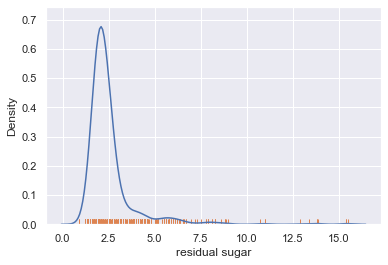

In [70]:
sns.kdeplot(data=wine, x="residual sugar")
sns.rugplot(data=wine, x="residual sugar")

<AxesSubplot:xlabel='chlorides', ylabel='sulphates'>

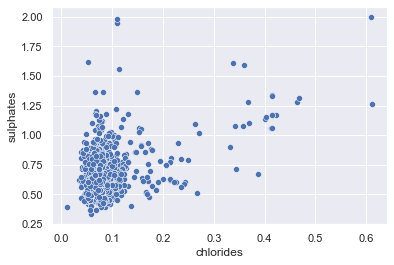

In [71]:
sns.scatterplot(data=wine, x="chlorides", y="sulphates")

<AxesSubplot:xlabel='density', ylabel='alcohol'>

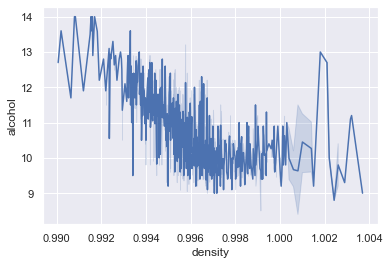

In [72]:
sns.lineplot(data=wine, x="density", y="alcohol")

LINEAR REGRESSION

<AxesSubplot:xlabel='fixed acidity', ylabel='volatile acidity'>

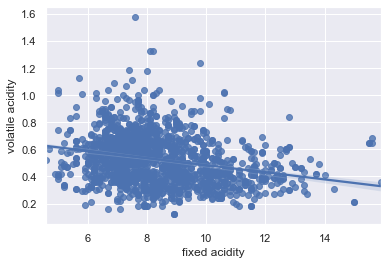

In [73]:
sns.regplot(x="fixed acidity", y="volatile acidity", data = wine)


In [79]:
wine.columns=['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol','quality']

In [80]:
model= wine[['residual_sugar', 'density']]

In [81]:
model

,residual_sugar,density
0,1.9,0.99780
1,2.6,0.99680
2,2.3,0.99700
3,1.9,0.99800
4,1.9,0.99780
...,...,...
1594,2.0,0.99490
1595,2.2,0.99512
1596,2.3,0.99574
1597,2.0,0.99547


In [85]:
x = model.residual_sugar

In [86]:
y = model.density

In [89]:
model = LinearRegression()

In [90]:
model.fit(np.array(x).reshape(-1,1),y)

LinearRegression()

In [91]:
model.intercept_

0.9955392654410328

In [92]:
model.coef_

array([0.00047558])

In [93]:
model.score(np.array(x).reshape(-1,1),y)

0.12622627369731354

MULTIPLE LINEAR REGRESSION

In [94]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [95]:
X = wine[['fixed_acidity', 'citric_acid', 'chlorides']]
Y= wine['quality']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)

In [97]:
model = LinearRegression()

In [98]:
model.fit(X_train, y_train)

LinearRegression()

In [99]:
model.intercept_

0.9896561453748697

In [100]:
model.coef_

array([ 0.00084209, -0.00191686,  0.00692856])

In [101]:
model.score(X_train, y_train)

0.48139023757337174

In [102]:
model.predict(X_test)


array([0.99913599, 0.99597241, 0.99566654, 0.99813561, 0.9965109 ,
       0.99710123, 0.99655971, 1.00034152, 0.99719281, 0.99820464,
       0.99600217, 0.99678644, 0.99555754, 0.99600494, 0.99699857,
       0.99567246, 0.99862649, 0.99651551, 0.99668635, 0.99607691,
       0.99972805, 0.99607145, 0.99637703, 0.99619409, 0.99389679,
       0.99686723, 0.99643523, 0.9962158 , 0.9955888 , 0.99742522,
       0.99855695, 0.99651349, 0.99645532, 0.99594683, 0.99818564,
       0.9978357 , 0.9962343 , 0.99653777, 0.99739958, 0.99770501,
       0.99613177, 0.99888596, 0.99515214, 0.99890998, 0.9962158 ,
       0.99792663, 0.99681051, 0.99974489, 0.99821419, 0.99597261,
       0.99578514, 0.99959951, 0.99743154, 0.99553569, 0.99818339,
       0.99561424, 0.99881509, 0.99871327, 0.99901264, 0.99484498,
       0.99603457, 0.99744424, 0.99504047, 0.99541158, 0.99788622,
       0.99587593, 0.99880412, 0.99539524, 0.99547142, 0.99770663,
       0.9973619 , 0.99617472, 0.99714923, 0.99850542, 0.99630

In [103]:
y_test.values

array([1.001  , 0.99654, 0.9951 , 0.9972 , 0.9983 , 0.9976 , 0.9966 ,
       1.0018 , 0.9968 , 0.997  , 0.9951 , 0.99658, 0.9972 , 0.99522,
       0.99504, 0.99553, 1.0001 , 0.99538, 0.9972 , 0.99565, 0.9981 ,
       0.9966 , 0.9979 , 0.9966 , 0.9924 , 0.99676, 0.99506, 0.99458,
       0.9968 , 0.99534, 1.     , 0.9967 , 0.99599, 0.99693, 1.0015 ,
       0.998  , 0.99376, 0.99613, 0.999  , 0.99712, 0.99828, 1.0003 ,
       0.995  , 0.9982 , 0.99458, 0.996  , 0.9961 , 1.0022 , 1.0026 ,
       0.9959 , 0.9956 , 0.99836, 0.9983 , 0.9972 , 0.99728, 0.99693,
       0.99783, 1.0002 , 0.9994 , 0.99467, 0.99714, 0.9981 , 0.99514,
       0.99538, 0.9996 , 0.9958 , 0.99818, 0.9949 , 0.997  , 0.99782,
       0.99786, 0.99713, 0.99576, 0.9972 , 0.9984 , 0.9976 , 0.9982 ,
       0.9962 , 0.99735, 0.9978 , 0.99692, 0.9996 , 0.99803, 0.99524,
       0.99562, 0.9984 , 0.9987 , 0.9968 , 0.99528, 0.9969 , 0.997  ,
       0.99615, 0.9963 , 0.99596, 0.9933 , 0.998  , 0.99622, 0.99702,
       0.99605, 0.99

In [104]:
model.score(X_test, model.predict(X_test))


1.0

In [105]:
model.score(X_train, model.predict(X_train))

1.0

In [106]:
model.score(X_test, y_test)

0.5001458763427555

In [107]:
model.score(X_train, y_train)

0.48139023757337174

In [108]:
model.score(X_train, y_train)

0.48139023757337174

In [109]:
pd.get_dummies(x, drop_first = True)

,1.20,1.30,1.40,1.50,1.60,1.65,1.70,1.75,1.80,1.90,...,8.90,9.00,10.70,11.00,12.90,13.40,13.80,13.90,15.40,15.50
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
model.fit(pd.get_dummies(x, drop_first = True),y)

LinearRegression()